# Explore Data

**Source:** FBI National Stolen Art File\
**Retrieval Date:** August 25, 2024\
**About:** A listing of the paintings, statuary, and other forms of fine art in the FBI's database.\
**Source URL:** [Access web database here.](https://artcrimes.fbi.gov/)\
**Github Source:** The data taken from the FBI National Stolen Art File is saved in several formats in this repo.

In [2]:
import numpy as np
import pandas as pd

/Users/Alli_1/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/Alli_1/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
from matplotlib import rcParams

In [5]:
import seaborn.objects as so
from matplotlib import style

In [6]:
df = pd.read_csv('/Users/Alli_1/Documents/Repos/fbi_stolen_art_research/Data/nsaf_books-watercolor-painting_sample.csv',na_values=['NA'])

In [7]:
df['duration'] = df['TP_End']-df['TP_Start'] + 1

In [8]:
df['mid_year'] = df['TP_Start'] + (df['duration'] / 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          230 non-null    object 
 1   Category                       230 non-null    object 
 2   Unique-Multiple                230 non-null    object 
 3   Image                          230 non-null    object 
 4   Ref_Num                        230 non-null    int64  
 5   Maker_Artist                   230 non-null    object 
 6   Artist_2                       24 non-null     object 
 7   Artist_Culture                 230 non-null    object 
 8   Artist_2_Culture               25 non-null     object 
 9   Manufacture_Country            230 non-null    object 
 10  Materials                      220 non-null    object 
 11  Material_Primary-Base          230 non-null    object 
 12  Material_Secondary             230 non-null    obj

With data loaded and formatted correctly, also creating version of individual categories for ease of use later in analysis...

In [26]:
#30 books in sample
books = df[df['Category'] == 'Books and Ephemera']

In [27]:
#31 drawings and watercolors in sample
dwcs = df[df['Category'] == 'Drawings and Watercolors']

In [28]:
#169 paintings in sample
paintings = df[df['Category'] == 'Paintings']

## Metrics & Visualizations

### Object Sizes

The median object size from my sample is 24 in (60.96 cm) with a standard deviation of 17.37 in. Since my research only included three categories, we shouldn't seek to take too much away from the grouped metrics and should instead look at the metrics for each category.

In [13]:
df['Largest_Dim_CM'].describe()

count    230.000000
mean      68.234304
std       44.123791
min        9.000000
25%       35.560000
50%       60.960000
75%       86.360000
max      274.320000
Name: Largest_Dim_CM, dtype: float64

The size distribution for objects in the **Books and Ephemera** category is right-skewed. The mean and median sizes for those objects are 10.3 and 9.25 in, respectively, with the largest object being 17.7 in.

In [14]:
books['Largest_Dim_CM'].describe()

count    30.000000
mean     26.240000
std       8.124488
min       9.000000
25%      20.875000
50%      23.500000
75%      30.750000
max      45.000000
Name: Largest_Dim_CM, dtype: float64

The size distribution for objects in the **Drawings and Watercolors** category is more normally distributed. The mean and median sizes for those objects are 18.4 & 18.7 in, respectively. The largest work in that category's sample is 30 inches.

In [15]:
dwcs['Largest_Dim_CM'].describe()

count    31.000000
mean     46.747097
std      14.565704
min      23.190000
25%      33.655000
50%      47.500000
75%      55.245000
max      76.200000
Name: Largest_Dim_CM, dtype: float64

The size distribution for objects in the **Paintings** category is right-skewed. The mean and median sizes for those objects are 31.4 and 28.5 in, respectively. The largest work in the Paintings category sample is an outlier at 108 in.

In [16]:
paintings['Largest_Dim_CM'].describe()

count    169.000000
mean      79.630355
std       45.538887
min       10.160000
25%       50.800000
50%       72.390000
75%      101.600000
max      274.320000
Name: Largest_Dim_CM, dtype: float64

The following visual shows the three categories as one sample.

In [17]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nixie One','Garamond', 'Times New Roman']

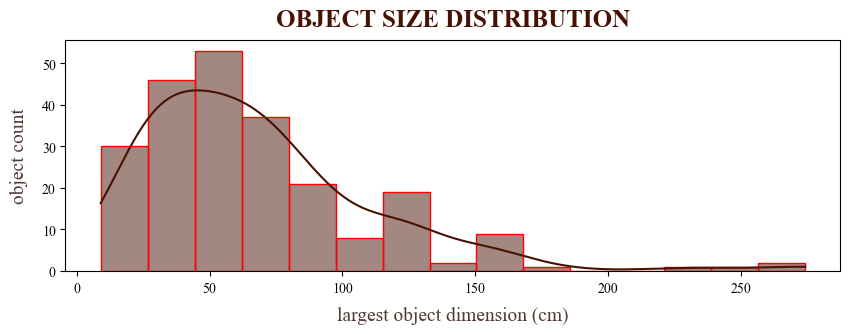

In [18]:
fig, ax = plt.subplots(figsize=(10, 3))

sns.histplot(df['Largest_Dim_CM'], bins=15, kde=True, color='#471203', edgecolor='red')
sns.set_style(rc={"axes.facecolor": "#F0E8F0", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','ytick.color':'#523A34',})

plt.xlabel('largest object dimension (cm)', fontsize=14, color="#523A34", labelpad=8)
plt.ylabel('object count', fontsize=14, color="#523A34", labelpad=10)
plt.title('OBJECT SIZE DISTRIBUTION', color="#471203", fontweight='bold', fontsize=18, pad=10)

plt.show()
fig.savefig("sizedistribution_1.png", dpi=300)

**Next**, if we look at the distributions of the objects' largest dimensions by category. With these boxplots, we can see how different the object size distributions are by category and how the numerous outliers are impacting the Paintings category.

In [19]:
import ptitprince as pt

In [20]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Nixie One','Garamond', 'Times New Roman']

In [21]:
# The style of the line that represents the median.
medianprops = {"linewidth": 1.5, "color": "#471203", "linestyle":'--',"solid_capstyle": "butt"}
# The style of the box ... This is also used for the whiskers
boxprops = {"linewidth": 1.5, "color": "#471203", "linestyle":'--'}

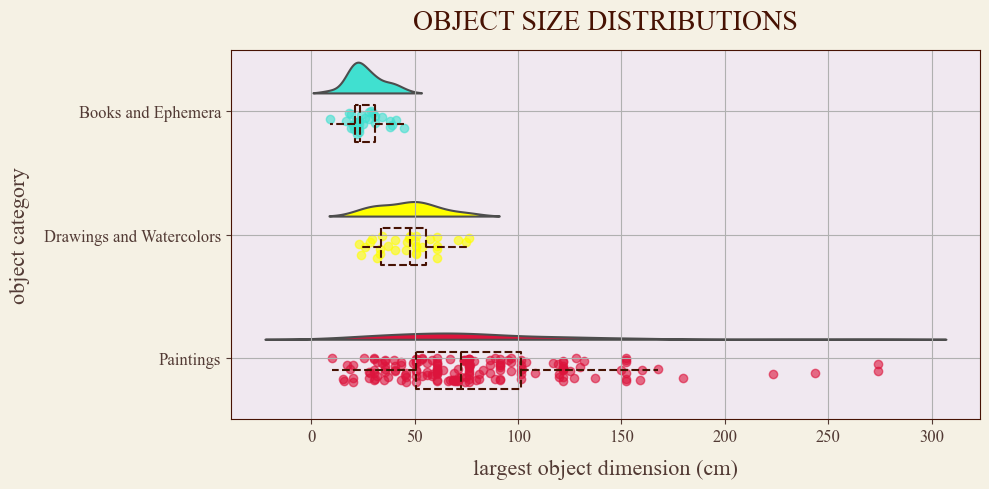

In [22]:
CATEGORY = ["Books and Ephemera", "Drawings and Watercolors", "Paintings"]
COLORS = ["turquoise", "yellow", "crimson"]

# Create axes with custom size
fig, ax = plt.subplots(figsize=(10, 5))

sns.set_style(rc={"axes.facecolor": "#F0E8F0", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','ytick.color':'#523A34',})

pt.half_violinplot(y="Category", x="Largest_Dim_CM", palette=COLORS,
                   inner=None, data=df, width=0.5, ax=ax)

# Iterate over the CATEGORIES
for i, category in enumerate(CATEGORY):
    # Subset the data
    data = df[df["Category"] == category]
    
    # Jitter the values on the vertical axis
    y = i + np.random.uniform(high=0.2, size=len(data))
    
    # Select the values of the horizontal axis
    x = data["Largest_Dim_CM"]
    
    # Add the rain using the scatter method.
    ax.scatter(x, y, color=COLORS[i], alpha=0.6)
    
# Generate list of arrays
boxplot_data = [
    df[df["Category"] == category]["Largest_Dim_CM"].values 
    for category in CATEGORY
]
    
# Positions are shifted now
SHIFT = 0.1
POSITIONS = [0 + SHIFT, 1 + SHIFT, 2 + SHIFT]

ax.boxplot(
    boxplot_data, 
    vert=False, 
    positions=POSITIONS, 
    manage_ticks=False,
    showfliers = False, # Do not show the outliers beyond the caps.
    showcaps = False,   # Do not show the caps
    medianprops = medianprops,
    whiskerprops = boxprops,
    boxprops = boxprops
)

# Finally, add labels and a title

plt.xlabel("largest object dimension (cm)", fontsize=16, color="#523A34", labelpad=10)
plt.ylabel("object category", fontsize=16, color="#523A34", labelpad=10)
plt.title("OBJECT SIZE DISTRIBUTIONS", fontsize=20, color="#471203", pad=15)

ax.grid(True)

# Change size of tick labels
ax.tick_params(labelsize=12, labelcolor="#523A34")
plt.tight_layout()
plt.show()

fig.savefig("sizedistribution_x.png", dpi=300)

**Next**, we can see how the categories look overlaid on each other in a single chart. This helps illustrate that, while the object distributions do vary by category, all three categories veer towards smaller sizes, with a significant drop in object counts after 100 cm (37.4 in).

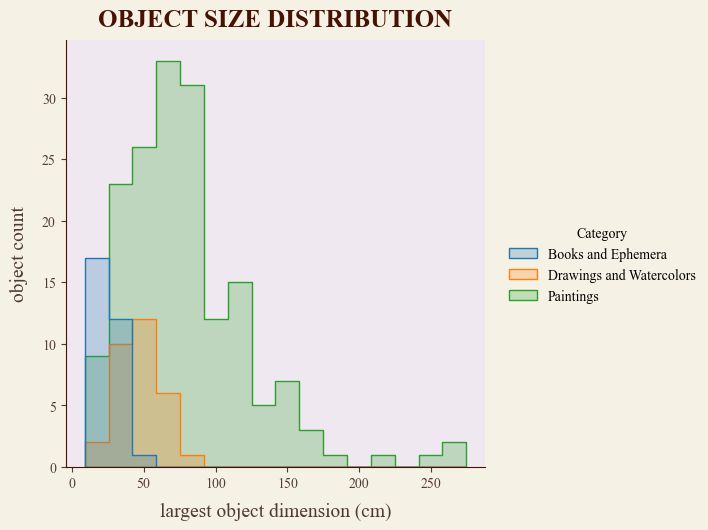

In [23]:
rcParams['figure.figsize'] = 10,3
sns.displot(df, x="Largest_Dim_CM", hue="Category", element="step")
sns.set_style(rc={"axes.facecolor": "#F0E8F0", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','ytick.color':'#523A34',})
plt.xlabel('largest object dimension (cm)', fontsize=14, color="#523A34", labelpad=8)
plt.ylabel('object count', fontsize=14, color="#523A34", labelpad=10)
plt.title('OBJECT SIZE DISTRIBUTION', color="#471203", fontweight='bold', fontsize=18, pad=10)
plt.savefig("sizedistribution_3.png", dpi=300)

You can also see how the total distribution veers toward smaller objects in this stacked approach.

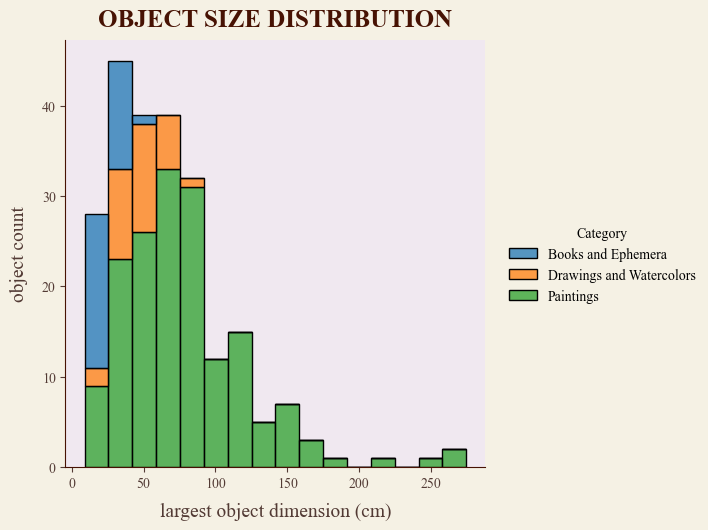

In [24]:
rcParams['figure.figsize'] = 10,3
sns.displot(df, x="Largest_Dim_CM", hue="Category",multiple="stack")

plt.xlabel('largest object dimension (cm)', fontsize=14, color="#523A34", labelpad=8)
plt.ylabel('object count', fontsize=14, color="#523A34", labelpad=10)
plt.title('OBJECT SIZE DISTRIBUTION', color="#471203", fontweight='bold', fontsize=18, pad=10)
plt.savefig("sizedistribution_4.png", dpi=300)

Or by considering the distribution density.

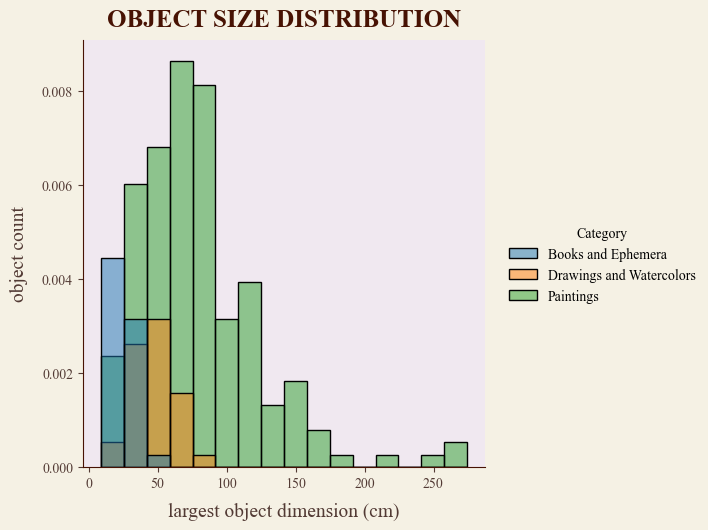

In [25]:
rcParams['figure.figsize'] = 10,3
sns.displot(df, x="Largest_Dim_CM", hue="Category", stat="density")
sns.set_style(rc={"axes.facecolor": "#F0E8F0", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','ytick.color':'#523A34',})
plt.xlabel('largest object dimension (cm)', fontsize=14, color="#523A34", labelpad=8)
plt.ylabel('object count', fontsize=14, color="#523A34", labelpad=10)
plt.title('OBJECT SIZE DISTRIBUTION', color="#471203", fontweight='bold', fontsize=18, pad=10)
plt.savefig("sizedistribution_5.png", dpi=300)
plt.show()

**One variable worth considering with the different category size distributions is the impact of the object's base material.**

Paintings on canvas can be removed from their stretchers or cut from their frames. In this sense, paintings on canvas can be made smaller without significantly altering their market value.

When we slice the largest dimension variable by material, looking at canvas vs. paintings on wood, we can see that canvas may be a factor in why paintings have so many size outliers.

In [29]:
canvas_size = paintings[paintings['Material_Primary-Base'] == 'canvas']['Largest_Dim_CM'].median()
panel_size = paintings[paintings['Material_Primary-Base'] == 'wood']['Largest_Dim_CM'].median()
paintings_size = paintings['Largest_Dim_CM'].median()

print(f"Median Largest Dimensions\nFull painting's sample: {paintings_size} cm\nCanvases only: {canvas_size} cm\nPanels only: {panel_size} cm")

Median Largest Dimensions
Full painting's sample: 72.39 cm
Canvases only: 74.3 cm
Panels only: 60.980000000000004 cm


### Artist Culture

**American is the most frequently represented culture** among this sample's artists/makers/authors, with 87 objects or 37.8% of the sample. This makes sense given that this is, first and foremost, an American databas

American was followed by French, Italian, English, and Lithuanian. It is expected that we see a high number of French artists given the migration of artists and artworks between France and the US between and directly after the two world wars. Italian artists are highly represented in collections of Old Masters artworks. It is also reasonable that we see quite a few works by English artists, given the relationship between our two countries and the importance of British publishing houses for consumers of English-language books. 

The high frequency of objects made by Lithuanian artists is due to **a 30-year old crime skewing the data**. In 1994, a storage unit belonging to the Lithuanian-American artist Arbit Blatas was robbed, with over 200 paintings taken. Thirteen of those lost works ended up in my sample.

In [482]:
df['Artist_Culture'].value_counts(normalize=True)

Artist_Culture
American      0.378261
French        0.078261
Italian       0.065217
English       0.060870
Lithuanian    0.056522
Chinese       0.047826
Unknown       0.043478
Russian       0.043478
Dutch         0.026087
Mexican       0.026087
German        0.017391
Peruvian      0.017391
Flemish       0.017391
Danish        0.013043
Japanese      0.013043
Armenian      0.013043
Cuban         0.013043
Persian       0.008696
Argentan      0.008696
Spanish       0.008696
Iranian       0.008696
Ukrainian     0.008696
Romanian      0.004348
Manx          0.004348
Bulgarian     0.004348
Egyptian      0.004348
Belgian       0.004348
Slavic        0.004348
Name: proportion, dtype: float64

Most of the objects in these three sampled categories only have one associated artist/maker/author. The objects with secondary makers are primarily in the Books and Ephemera category, which is why we see secondary cultures most frequently associated with cultures important to early and modern English-language and European publishing. If I move into preparing the sample of the objects in the Prints category, I would also expect to see more objects with a secondary artist/maker in the form of the printers and publishers.

In [483]:
df_ac_counts = df.groupby('Artist_Culture').count().reset_index()
df_ac_counts = df_ac_counts[['Artist_Culture','Title']].rename(columns={"Artist_Culture": "culture", "Title": "count"})
df_ac_counts['type'] = 'primary'

In [484]:
df_a2c_counts = df.groupby('Artist_2_Culture').count().reset_index()
df_a2c_counts = df_a2c_counts[['Artist_2_Culture','Title']].rename(columns={"Artist_2_Culture": "culture", "Title": "count"})
df_a2c_counts['type'] = 'secondary'

In [485]:
df_ac_tcombo = pd.concat([df_a2c_counts, df_ac_counts]).sort_values("count", ascending=False).set_index("culture")
df_ac_tcombo.head()

,count,type
culture,,
American,87,primary
French,18,primary
Italian,15,primary
English,14,primary
Lithuanian,13,primary


In [486]:
plt.rcParams['font.serif'] = ['Nixie One','Garamond', 'Times New Roman']

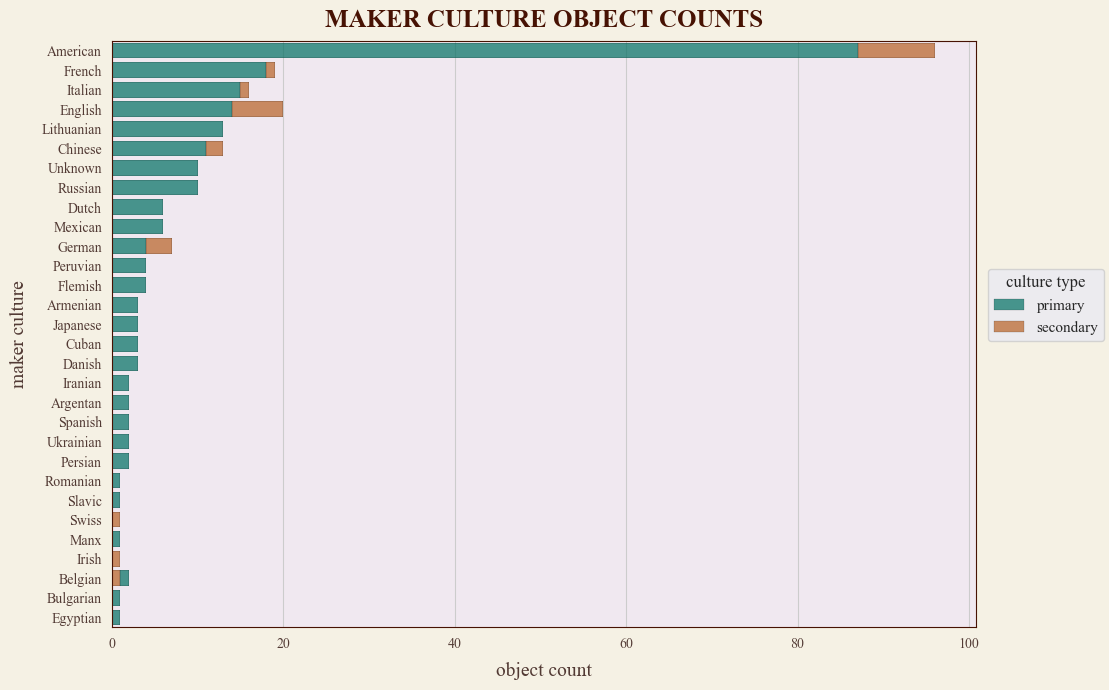

<Figure size 1000x300 with 0 Axes>

In [494]:
custom_colors = ["#006F62", "#B86125"]

# 1. Create a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 7))

sns.set_style(rc={"axes.facecolor": "#F0E8F0", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','ytick.color':'#523A34','font.family':'serif'})

# 2. Create a Seaborn object plot and use .on() to attach it to the axes
plot = (
    so.Plot(df_ac_tcombo, y="culture", x="count",color="type").add(so.Bar(edgecolor="black",edgewidth=.1,width=0.8), so.Stack())).label(color="culture type").scale(color=custom_colors).on(ax)

plot.plot()
plt.xlabel('object count', fontsize=14, color="#523A34", labelpad=8)
plt.ylabel('maker culture', fontsize=14, color="#523A34", labelpad=10)
ax.set_title("MAKER CULTURE OBJECT COUNTS", color="#471203", fontweight='bold', fontsize=18, pad=10)
plt.tight_layout()
plt.show()
plt.savefig("culture_bar.png", dpi=300)

### Predominant Color

I was curious about how aesthetic desirability related to incidents of theft. There is no universal scale for aesthetic desirability. However, studies have found that blue and red paintings sell for more than other colors at auction. Anecdotally, gallerists and publishers will tell you that blue works are particularly strong.

With this in mind, I labeled the objects in the samples with their predominant color. Works without images or other relevant information available were coded as "Unknown" for their predominant color. Works that did not easily jump out as having a predominant color by the human eye were coded as "Multi."

In [495]:
df_colors = df.groupby('Color-Primary').count().reset_index()
df_colors = df_colors[['Color-Primary','Title']].rename(columns={"Color-Primary": "color", "Title": "count"})
df_colors = df_colors.sort_values('count', ascending=False)
df_colors.head()

,color,count
7,Multi,57
11,Unknown,40
2,Blue,32
1,Black and white,23
10,Red,14


In [496]:
color_crosstab = pd.crosstab(df['Color-Primary'], df['Category'])
print(color_crosstab)

Category         Books and Ephemera  Drawings and Watercolors  Paintings
Color-Primary                                                           
Black                             0                         0          3
Black and white                  10                        11          2
Blue                              0                         3         29
Brown                             1                         3          6
Gold                              0                         0          4
Gray                              0                         1          1
Green                             0                         1          4
Multi                             1                         4         52
Orange                            0                         0          7
Pink                              0                         1          5
Red                               0                         2         12
Unknown                           2                

In [497]:
color_crosstab = color_crosstab.stack().reset_index(name='count').sort_values("count", ascending=False)
color_crosstab.head()

,Color-Primary,Category,count
23,Multi,Paintings,52
35,Unknown,Paintings,35
8,Blue,Paintings,29
32,Red,Paintings,12
4,Black and white,Drawings and Watercolors,11


Black and white was predominant among **Books and Ephemera** and **Drawings and Watercolors**.

Just as blue and red are key colors for auction sales, blue and red were the most popular colors for paintings other than multi. **This suggests that just as there is a correlation between artwork color and achieved sales, there may be a correlation between artwork color and theft.**

This next chart shows the predominant color by object category. 

In [498]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = ['Garamond', 'Times New Roman']

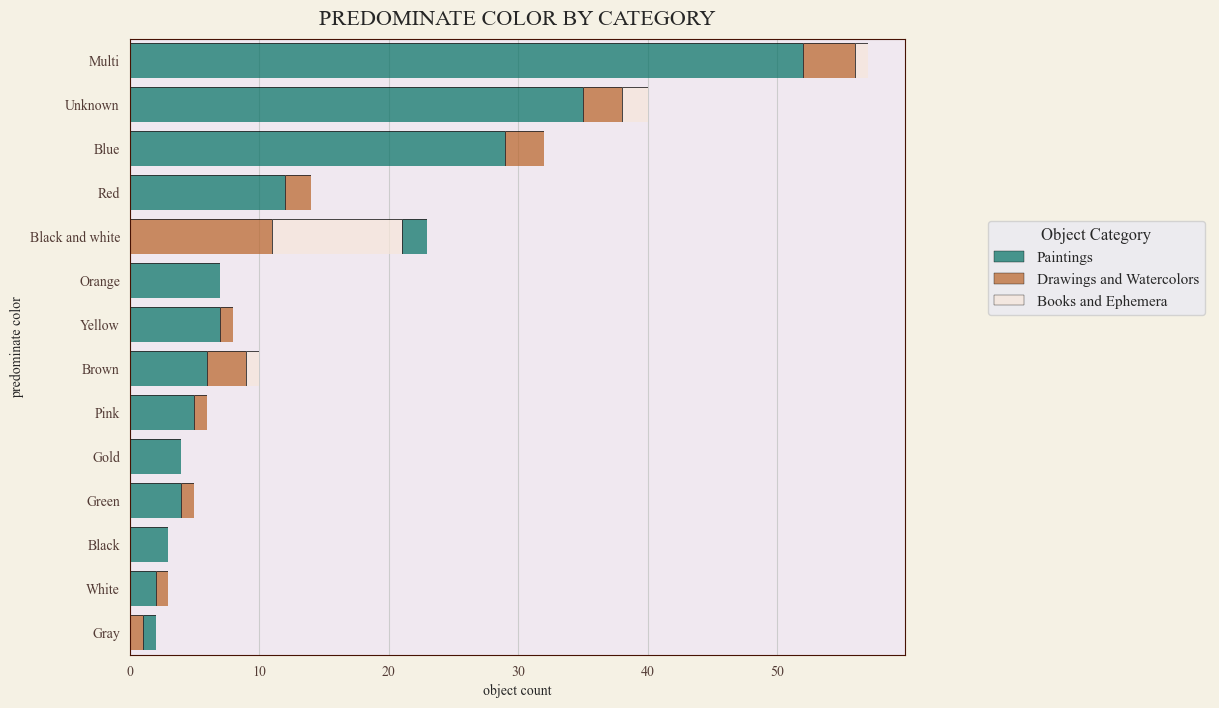

In [500]:
custom_colors = ["#006F62", "#B86125", "#F7E6DA"] #, "#74E3C9"]

# 1. Create a Matplotlib figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

sns.set_style(rc={"axes.facecolor": "#F0E8F0", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','ytick.color':'#523A34','font.family':'serif'})

# 2. Create a Seaborn object plot and use .on() to attach it to the axes
plot = (
    so.Plot(color_crosstab, y="Color-Primary", x="count",color="Category")
    .add(so.Bar(edgecolor="black", edgewidth=.25), so.Stack())).label(x="object count", y="predominate color", color="Object Category").scale(color=custom_colors).on(ax)

# 3. Compile and render the plot
plot.plot() # Use .plot() to compile without immediately showing the figure

# 5. Further customization on the original 'ax' object
ax.set_title("PREDOMINATE COLOR BY CATEGORY", fontsize=16, pad=10)

# 6. Display the plot
plt.show()
fig.savefig("predominatecolor_bar.png", dpi=300)

### Time Periods

I was also interested to see if age had any relationship to theft. However, there is an innate issue with addressing this question with this dataset. If this is a dataset of open cases, the longer a case is around, the more likely it is to be solved, and then have the related objects removed from the NSAF.

It could be hypothesized that the longer an object has existed, the more chances it has had of being stolen and ultimately entered on this list. However, because the NSAF appears to be predominantly comprised of new cases and long-cold cases, the dates of the thefts are also impacting the potential newness of the objects featured.

Nonetheless, I felt that it was worth seeing if there was anything of interest in this variable

In [501]:
bk_median = books['mid_year'].median()
dwcs_median = dwcs['mid_year'].median()
paintings_median = paintings['mid_year'].median()

This first time period chart looks at the estimated creation windows for the objects in the NSAF sample by category. Each object in the chart is represented by a semitransparent bar, with start and end points on the x-axis representing the open and close of the object's potential creation period. The chart shows dates with high object counts through areas of higher color saturation due to the overlapping bars.

The median year for each object category is also shown with a dotted vertical line in corresponding colors.

In [502]:
colors = {"Books and Ephemera":"#0B6E4F", "Drawings and Watercolors":"#F2FF00", 'Paintings':"#F800F8"}
patches = []
for category in colors:
    patches.append(matplotlib.patches.Patch(color=colors[category]))

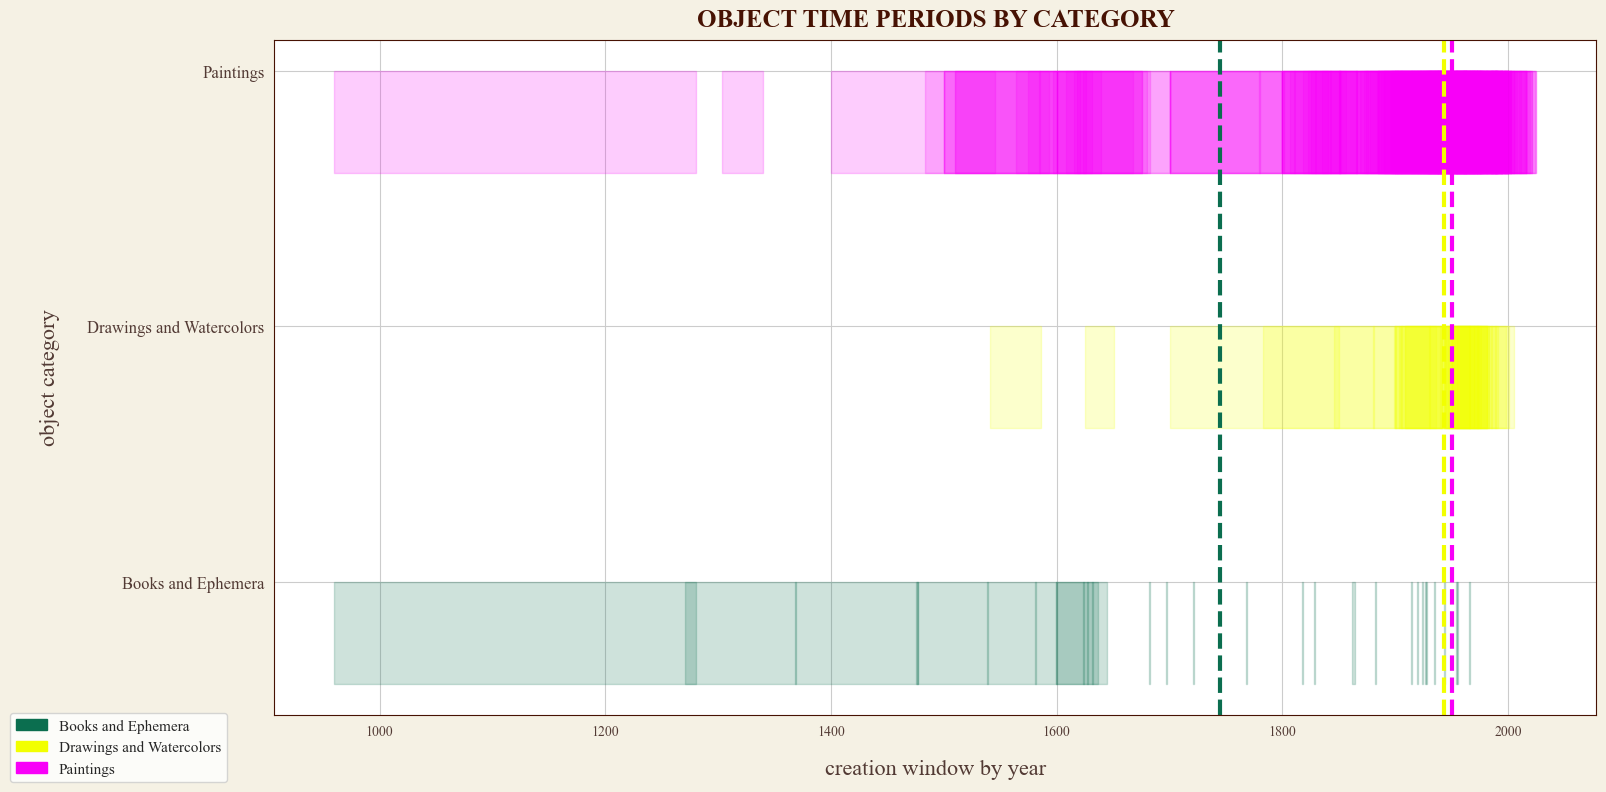

In [504]:
fig,ax=plt.subplots(figsize=(16, 8))

sns.set_style(rc={"axes.facecolor": "white", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','xtick.labelsize': 12,'ytick.color':'#523A34','font.family':'serif'})

#adding gantt bars
labels=[]
for i, task in enumerate(df.groupby("Category")):
    labels.append(task[0])
    for r in task[1].groupby("Category"):
        data = r[1][["TP_Start", "duration"]]
        ax.broken_barh(data.values, (i-0.4,0.4), color=colors[r[0]], alpha=.2)

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels,fontsize=12) 
ax.set_ylabel("object category", color="#523A34",fontsize=16, labelpad=20)
ax.set_xlabel("creation window by year", color="#523A34",fontsize=16, labelpad=15)
ax.legend(handles=patches, labels=colors.keys(), facecolor='white',fontsize=11,loc=[-0.2,-0.1])
        
#Adding median lines
plt.axvline(bk_median, color='#0B6E4F', linestyle='--', lw=3)
plt.axvline(dwcs_median, color='#F2FF00', linestyle='--', lw=3)
plt.axvline(paintings_median, color='#F800F8', linestyle='--', lw=3)

ax.set_title("OBJECT TIME PERIODS BY CATEGORY", color="#471203", fontweight='bold', fontsize=18, pad=10)
                
plt.tight_layout()       
plt.show()
fig.savefig("timeperiod_1.png", dpi=300)

Interestingly, in this next chart, sorting by category and country of creation, we can see that the oldest objects in these three category types were made in China, followed by Italy, and then Russia.

We see the highest saturation of objects from France in the 1900s, which again likely reflects the migration of artists and collectors from Paris to the United States around the period of the two world wars.

And, with the US being a younger country, it makes sense that all of the objects from the US in this sample were produced sometime after 1800. However, one major caveat to that finding is that cultural objects made by Indigenous peoples in what is now the US generally fell under other object categories than the three analyzed here. If more objects from Indigenous creators were represented in this chart, the United States timeline would reach much further back.

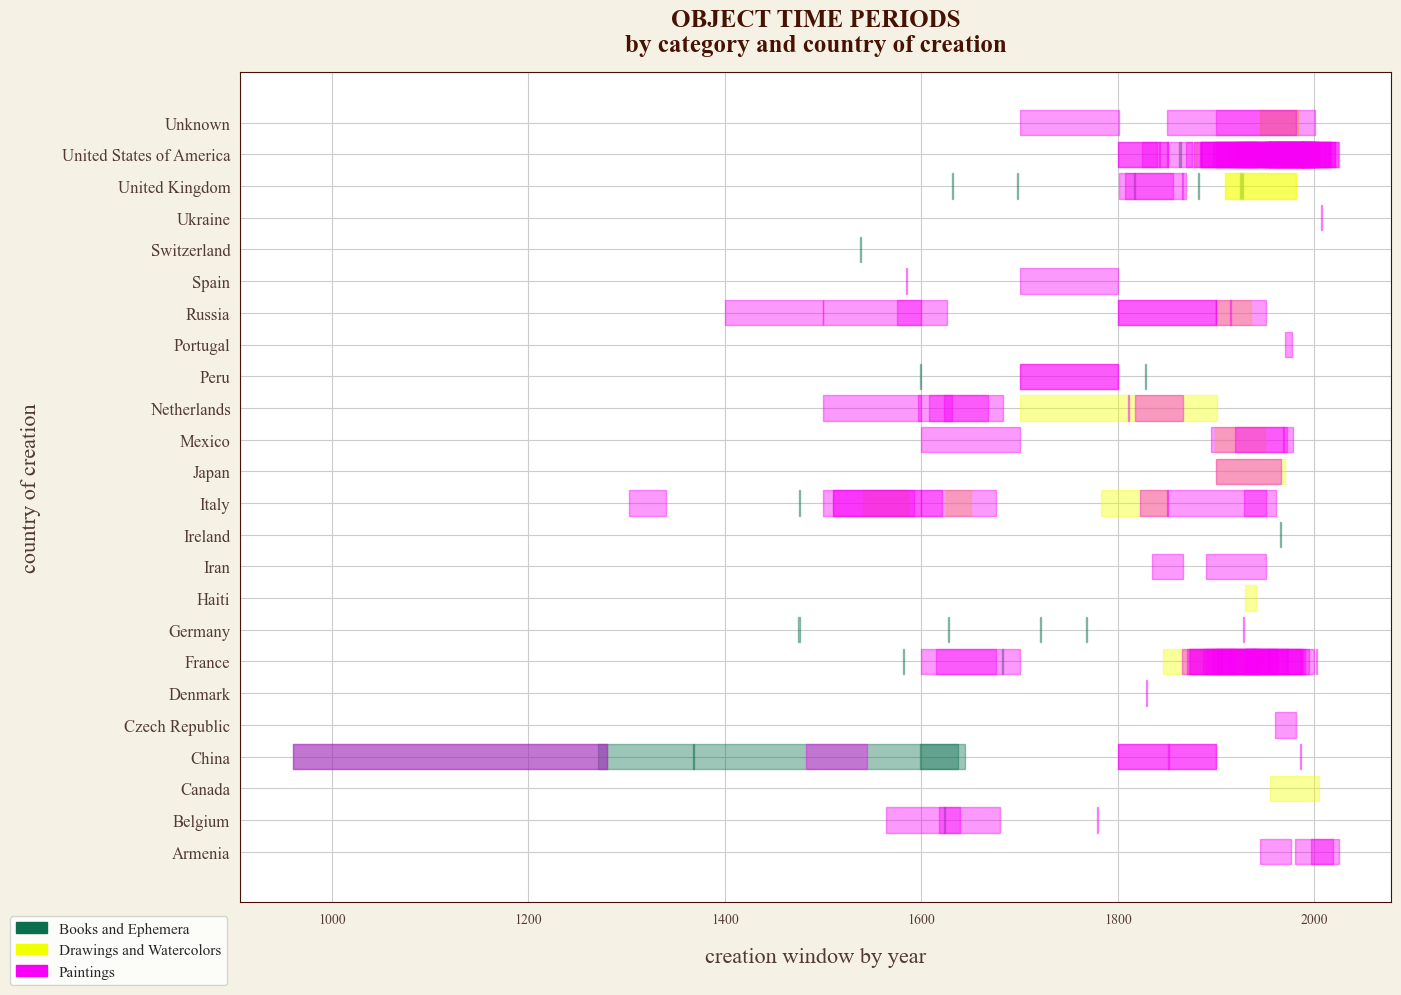

In [505]:
fig,ax=plt.subplots(figsize=(14, 10))

sns.set_style(rc={"axes.facecolor": "white", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','xtick.labelsize': 12,'ytick.color':'#523A34','font.family':'serif'})

labels=[]
for i, task in enumerate(df.groupby("Manufacture_Country")):
    labels.append(task[0])
    for r in task[1].groupby("Category"):
        data = r[1][["TP_Start", "duration"]]
        ax.broken_barh(data.values, (i-0.4,0.8), color=colors[r[0]], alpha=.4)

ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels,fontsize=12) 
ax.set_ylabel("country of creation", color="#523A34",fontsize=16, labelpad=15)
ax.set_xlabel("creation window by year", color="#523A34",fontsize=16, labelpad=15)
ax.legend(handles=patches, labels=colors.keys(), facecolor='white',fontsize=11,loc=[-0.2,-0.1])

ax.set_title("OBJECT TIME PERIODS\nby category and country of creation", color="#471203", fontweight='bold', fontsize=18, pad=15)

plt.tight_layout()       
plt.show()
fig.savefig("timeperiod_2.png", dpi=300)

The next chart shows object time periods by category and primary material. **Paper shows up across all object categories and has the longest timeline of any primary material in this sample by far.** This is an incredibly hopeful data point to come across. Compared to canvas and wood, paper is a much less hearty material. More practically, industrialization has made wood panels and canvas far more accessible in recent centuries than they were for artists long ago, making those materials more popular choices now than they would have been in 960, the earliest date in this sample.

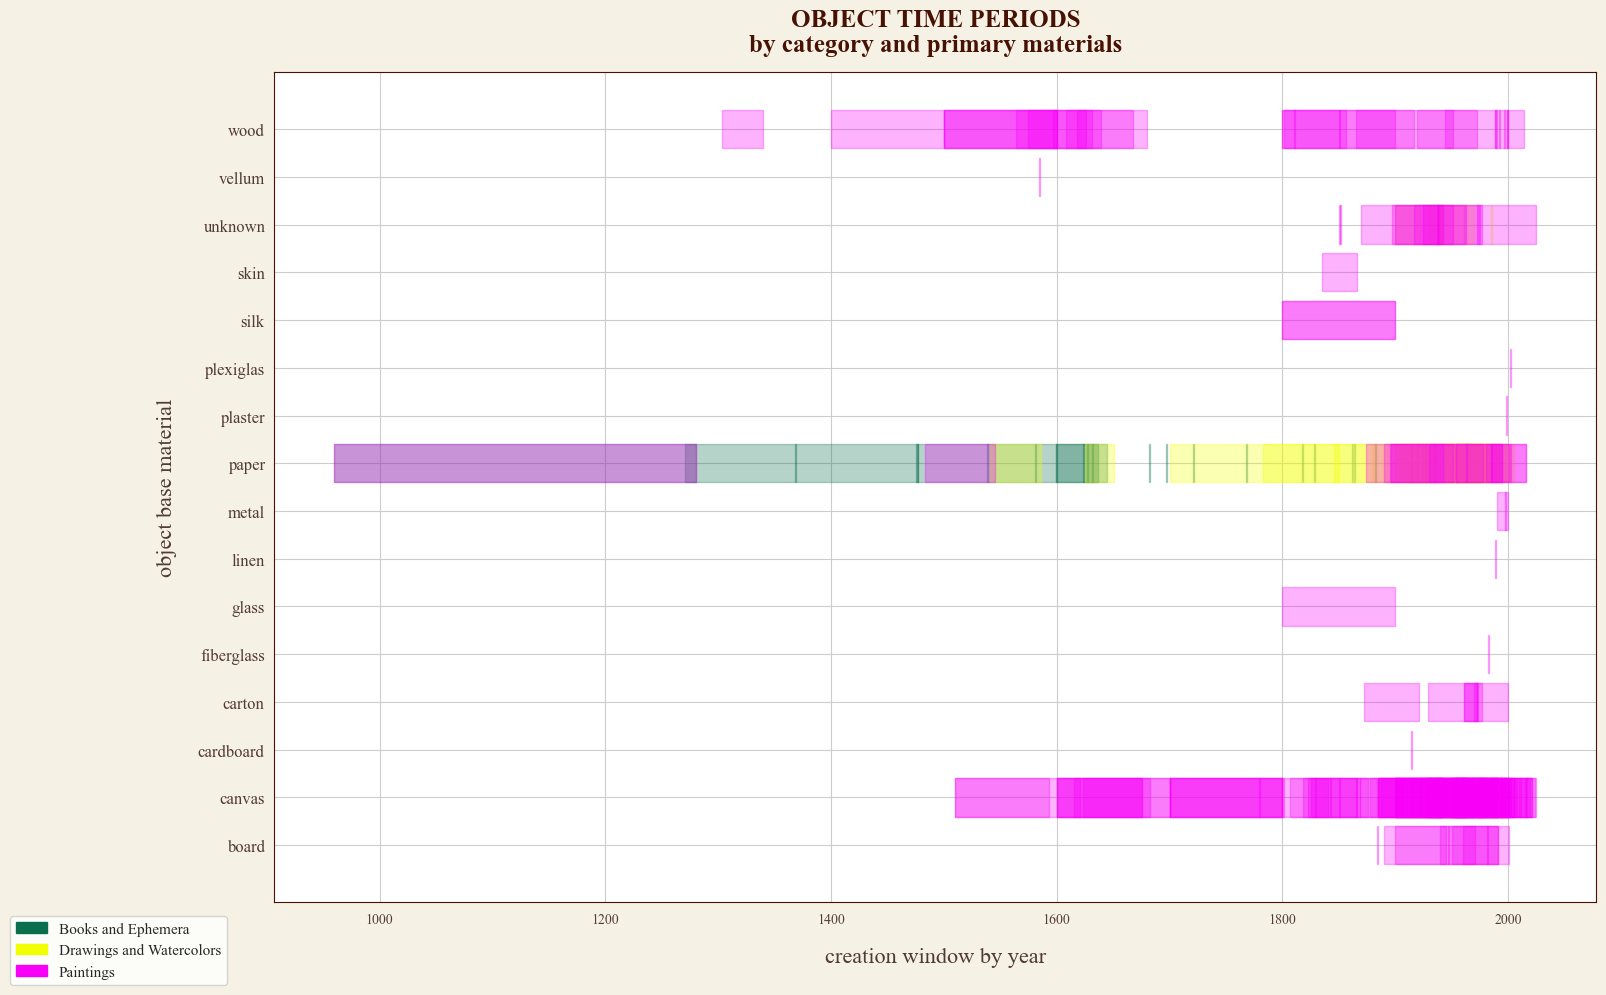

In [506]:
fig,ax=plt.subplots(figsize=(16, 10))

sns.set_style(rc={"axes.facecolor": "white", "figure.facecolor": "#F5F1E4", 'axes.edgecolor':'#471203',
                 'xtick.color':'#523A34','xtick.labelsize': 12,'ytick.color':'#523A34','font.family':'serif'})

labels=[]
for i, task in enumerate(df.groupby("Material_Primary-Base")):
    labels.append(task[0])
    for r in task[1].groupby("Category"):
        data = r[1][["TP_Start", "duration"]]
        ax.broken_barh(data.values, (i-0.4,0.8), color=colors[r[0]], alpha=.3)
        
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels,fontsize=12) 
ax.set_ylabel("object base material", color="#523A34",fontsize=16, labelpad=15)
ax.set_xlabel("creation window by year", color="#523A34",fontsize=16, labelpad=15)
ax.legend(handles=patches, labels=colors.keys(), facecolor='white',fontsize=11,loc=[-0.2,-0.1])

ax.set_title("OBJECT TIME PERIODS\nby category and primary materials", color="#471203", fontweight='bold', fontsize=18, pad=15)


plt.tight_layout()       
plt.show()
fig.savefig("timeperiod_3.png", dpi=300)